23RP01808

IT B-Tech

ML Summative Assessment


1.Data preprocessing

   

In [141]:
# a) Reading and Loading the dataset

# importing library for reading and loading the dataset
import pandas as pd

# Load the dataset using pandas
df = pd.read_csv('BankNote_Authentication.csv')

# displaying the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


(None,
    variance  skewness  curtosis  entropy  class
 0   3.62160    8.6661   -2.8073 -0.44699      0
 1   4.54590    8.1674   -2.4586 -1.46210      0
 2   3.86600   -2.6383    1.9242  0.10645      0
 3   3.45660    9.5228   -4.0112 -3.59440      0
 4   0.32924   -4.4552    4.5718 -0.98880      0)

In [143]:
# describe the dataset
df.describe()


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [145]:
# b) Checking for missing values

df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

2. Train a model using decision tree after finding that there is no missing value

In [149]:
# here is library to use from sklearn.metrics
from sklearn.model_selection import train_test_split
X = df.drop(columns=["class"])
y = df["class"]

# split the dataset into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
# Normalize or scale the numerica features

# here is library to use from sklearn.metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



2. Train a model using decision tree after finding that there is no missing value

In [153]:
# using decision tree algorithm in traing a model

# here is library to use from sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# and fit the model
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

3. Model evatuation using classification metrics

In [155]:
# making prediction
y_pred = model.predict(X_test_scaled)

In [157]:
# evaluate the model using metrics for classification 

# here is library to use from sklearn.metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy, conf_matrix, class_report



(0.9818181818181818,
 array([[148,   0],
        [  5, 122]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       148\n           1       1.00      0.96      0.98       127\n\n    accuracy                           0.98       275\n   macro avg       0.98      0.98      0.98       275\nweighted avg       0.98      0.98      0.98       275\n')

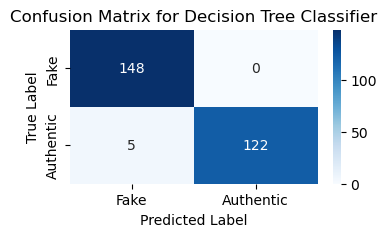

In [171]:
# here we use libraries like matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Authentic"], yticklabels=["Fake", "Authentic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


4. Deploying model using gradio

In [118]:
pip install gradio

  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.115.11-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.10.15-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.46.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached websockets-15.0.1-cp312-cp312-win_amd64

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.5.1 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 9.0.2 which is incompatible.


In [173]:
# model deployment using gradio

# here are libraries for gradio and numpy to use
import pickle as pk
import numpy as np
import gradio as gr


# creating function that can creat use input and returns prediction
def predict_banknote(variance, skewness, curtosis, entropy):
    # Preprocess input
    input_data = np.array([[variance, skewness, curtosis, entropy]])
    input_scaled = scaler.transform(input_data)
    
# predict
    prediction = model.predict(input_scaled)
    return "Authentic" if prediction[0] == 1 else "Fake"


In [175]:
# Create Gradio interface

interface = gr.Interface(
    fn=predict_banknote,
    inputs=[
        gr.Number(label="Variance"),
        gr.Number(label="Skewness"),
        gr.Number(label="Curtosis"),
        gr.Number(label="Entropy")
    ],
    outputs="text",
    title="Banknote Authentication",
    description="Enter the banknote features to check if it is authentic or fake."
)


In [127]:
# Testing the app predictions

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://53615d27f3637d29e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
